<a href="https://colab.research.google.com/github/pkoneill/VisualizingBrainWaves/blob/main/Visualizing_Brain_Waves_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
Earlier in the workshop we learned how Hans Berger was able to at last record two main types of brain waves using an EEG: Alpha waves and Beta waves. These waves are defined by their **frequency** of oscillation (how many peaks of the wave happen per second or Hertz(Hz)). Modern EEGs also pick up theta, delta and gamma waves!

<img src='https://github.com/pkoneill/VisualizingBrainWaves/blob/main/BrainWaves.png?raw=1' width=500px>


All of these waves are happening at the same time, many overlapping oscillations, which results in the "noisy" look of an EEG recording. 

Let's say we're interested in determining how alert a subject is and we therefore want to quantify the amount of beta frequency is in their EEG signal. Because of all the other ongoing waves, it can difficult to distinguish this by eye, especially since some frequencies are louder (higher amplitude) than others. 

We'll need a way to "demix" or "decompose" an EEG signal into the individual waves that comprise it.



# Objectives
In this tutorial, we work with Python code to simulate an EEG signal made up of different freqencies. Then we'll apply the **Fourier transform**, a mathematical tool, that will allow us to measure how much of each frequency an EEG signal contains. 

First, Here's a movie!


Video available at https://youtube.com/watch?v=spUNpyF58BY


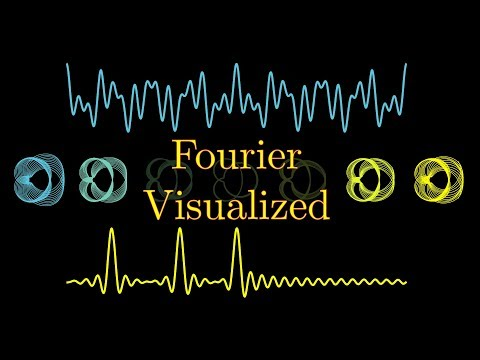

In [ ]:
#@title A visual intro to the Fourier Transform 
from IPython.display import YouTubeVideo
video = YouTubeVideo(id='spUNpyF58BY', width=854, height=480, fs=1, end=149)
print("Video available at https://youtube.com/watch?v=" + video.id)



#The Fourier Transform



## Imports and helper functions
We'll  begin by importing some Python packages needed for this session. Please execute the cells below to initialize the notebook environment.


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import wave, math

from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot



In [ ]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'

plt.style.use("https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/master/mplsettings")

In [ ]:
#@title Helper functions
numPeriods = 2 # number of periods of the sine waves
sRate = 10000 # sample rate in Hertz

numSamples = sRate * numPeriods # total number of samples

# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, numPeriods, numSamples)

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

----
## Simulate a periodic signal

First run the following three cells to create an EEG signal! 

Try adjusting the values for FREQUENCY and AMPLITUDE. What happens? 

In [ ]:
# Choose the FREQUENCY values to define three sine waves

############## Change the following values #########################
freq1 = 20.0 # frequency of first sine wave
freq2 = 30.0 # frequency of second sine wave
freq3 = 200.0 # frequency of third sine wave



In [ ]:
# Choose the AMPLITUDE values to define three sine waves

############## Change the following values #########################

amplitude1 = 20 # amplitude of first wave
amplitude2 = 10 # amplitude of second wave
amplitude3 = 5 # amplitude of third wave



(0.0, 0.5)

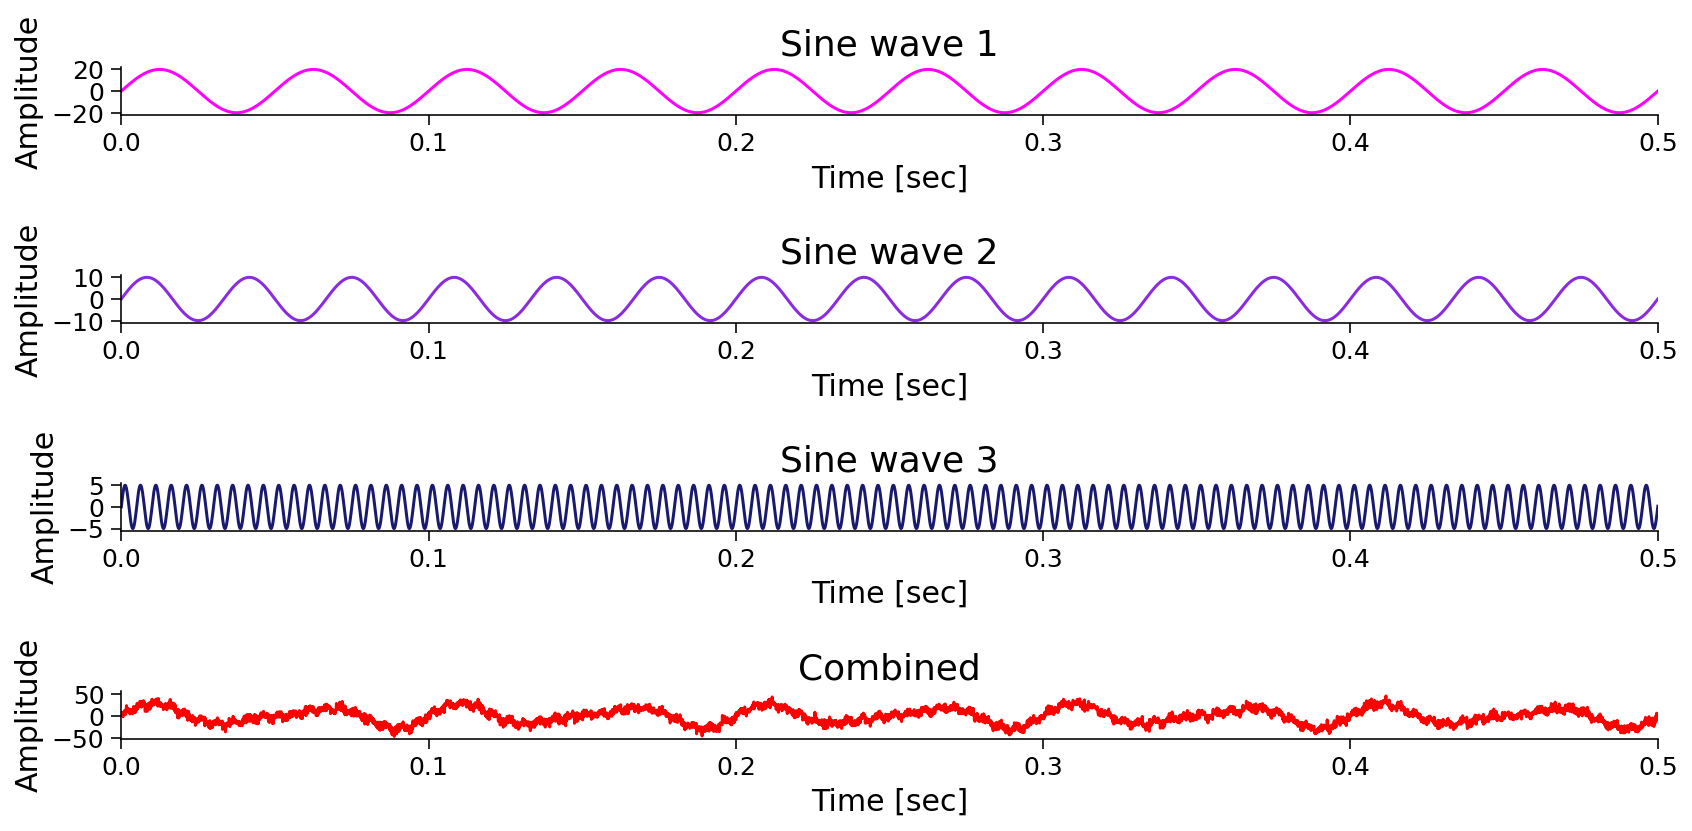

In [ ]:
#@title Plot the sine waves and the combination

f1 = lambda x: amplitude1*np.sin(freq1*2*np.pi*x)
f2 = lambda x: amplitude2*np.sin(freq2*2*np.pi*x)
f3 = lambda x: amplitude3*np.sin(freq3*2*np.pi*x)

sampled_f1 = [f1(i) for i in x]
sampled_f2 = [f2(i) for i in x]
sampled_f3 = [f3(i) for i in x]

sampled_fcomb = [(f1(i)+f2(i)+f3(i)) for i in x]
sampled_fcomb=np.array(sampled_fcomb)
# seed random number generator
seed(1)
# create white noise series
noise = [gauss(0.0, 1.0)*5 for i in sampled_fcomb]
new_signal = sampled_fcomb + noise

fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(411)
plt.plot(x, sampled_f1,color='magenta')
plt.title('Sine wave 1')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
#plt.ylim(-15, 15)

plt.subplot(412)
plt.plot(x, sampled_f2,color='blueviolet')
plt.title('Sine wave 2')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
#plt.ylim(-10, 10)

plt.subplot(413)
plt.plot(x, sampled_f3,color='midnightblue')
plt.title('Sine wave 3')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
#plt.ylim(-10, 10)

plt.subplot(414)
plt.plot(x, new_signal,'r')
plt.title('Combined')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
#plt.ylim(-25, 25)

---
## Calculate the Fourier Transform
The Fourier transform converts a signal in time into a signal in terms of frequency. Our three sine waves 
<img src='https://github.com/pkoneill/VisualizingBrainWaves/blob/main/FourierTransform.png?raw=1' width=500px>


In [ ]:
fft_output = np.fft.rfft(sampled_fcomb)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(numSamples//2+1)]

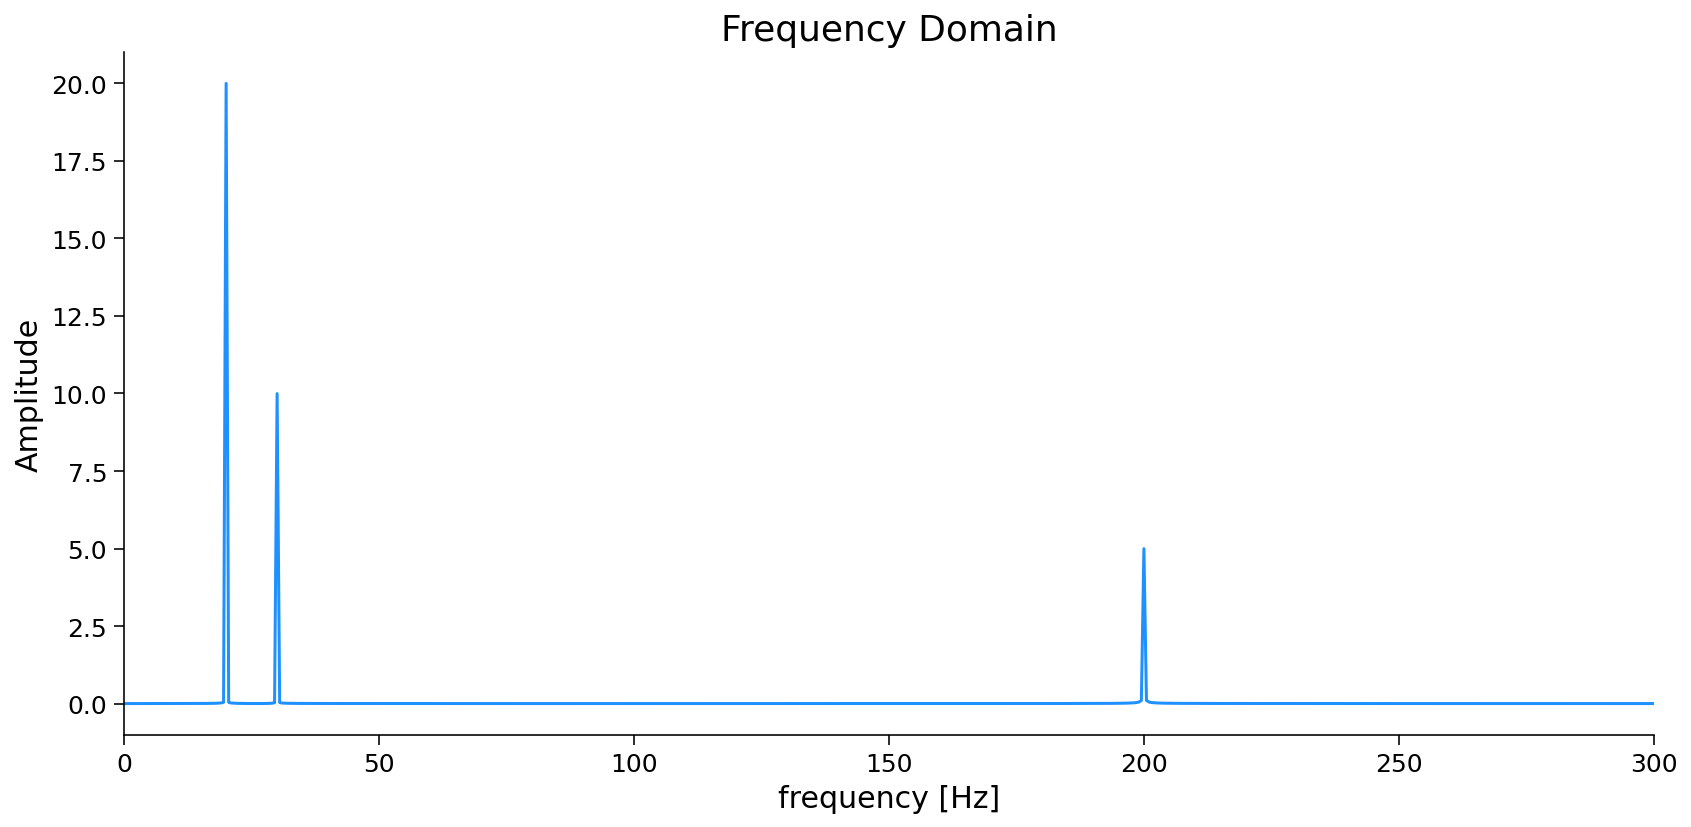

In [ ]:
#@title Plot our simulated EEG signal in frequency space

setup_graph(x_label='frequency [Hz]', y_label='Amplitude', 
            title='Frequency Domain', fig_size=(12,6))
plt.xlim(0, 300)
plt.plot(frequencies, magnitude, 'dodgerblue')

# Questions 


*   What effect on the combined signal did you observe when you changed the amplitude of one of the sine waves? What effect does this have on the subsequent Fourier transformed signal?
*   



##Further Resources!

Another great interactive visualization of the Fourier Transform [here!](https://prajwalsouza.github.io/Experiments/Fourier-Transform-Visualization)

A short, [Guardian article](https://www.theguardian.com/science/2014/jul/13/fourier-transform-maths-equations-history) on the many uses of the Fourier Transform.
